#📚 Bibliotecas

In [45]:
# importando biblioteca

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#📌 Extracão

In [56]:
# puxando json pelo caminho

dados = pd.read_json('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json')

In [57]:
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

In [65]:
# normalizando dados e concatenando

dados_normalizados = pd.concat([
    dados['customerID'],
    dados['Churn'],
    pd.json_normalize(dados['customer'], sep='_'),
    pd.json_normalize(dados['phone'], sep='_'),
    pd.json_normalize(dados['internet'], sep='_'),
    pd.json_normalize(dados['account'], sep='_')],
    axis=1)

dados_normalizados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [67]:
dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [72]:
# checando valores unicos das colunas do dataframe

for col in dados_normalizados.select_dtypes(include=['object']).columns[:]:
    print(f'{col}: {dados_normalizados[col].unique()}')

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes' '']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Charges_Total: ['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


Dados a serem tratados: <br>
'Churn' - retirar valores nulos<br>
'Charges_Total' - alterar pra valor numerico<br>
'SeniorCitizen' - alterar para 'sim' ou 'não'

In [83]:
# transformando churn - retirando valores nulos
# copia feita

copia_dn = dados_normalizados.copy()
copia_dn = copia_dn[copia_dn['Churn']!='']

# checando dados finais
copia_dn['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [89]:
# transformando chargestotal - alterando valor numerico
# parametro errors pra garantir conversao

copia_dn['Charges_Total'] = pd.to_numeric(copia_dn['Charges_Total'], errors='coerce')

# checando dados finais
copia_dn['Charges_Total'].dtype

dtype('float64')

In [95]:
# transformando seniorcitizen - alterando pra boolean

copia_dn['SeniorCitizen'] = copia_dn['SeniorCitizen'].replace(0,'No').replace(1, 'Yes')

# checando dados finais
copia_dn['SeniorCitizen'].unique()

array(['No', 'Yes'], dtype=object)

In [104]:
# ajuste nomes para padronização

# coluna 'tenure'
copia_dn.rename(columns = {'tenure' : 'Tenure'})
copia_dn = copia_dn.rename(columns = {'tenure' : 'Tenure'})

# coluna 'gender
copia_dn.rename(columns = {'gender' : 'Gender'})
copia_dn = copia_dn.rename(columns = {'gender' : 'Gender'})

In [106]:
# criacao da coluna contas_diarias

copia_dn['Charges_Daily'] = (copia_dn['Charges_Total'] / (copia_dn['Tenure'] * 30)).round(2)

#📊 Carga e análise

In [112]:
# media, mediana, desvio padrao e outras descricoes estatisticas

copia_dn.describe()

,Tenure,Charges_Monthly,Charges_Total,Charges_Daily
count,7043.000000,7043.000000,7032.000000,7032.000000
mean,32.371149,64.761692,2283.300441,2.159878
std,24.559481,30.090047,2266.771362,1.006210
min,0.000000,18.250000,18.800000,0.460000
25%,9.000000,35.500000,401.450000,1.207500
50%,29.000000,70.350000,1397.475000,2.350000
75%,55.000000,89.850000,3794.737500,3.010000
max,72.000000,118.750000,8684.800000,4.050000


In [165]:
# descricoes estatisticas das variaveis categoricas

copia_dn.describe(include='object')

,customerID,Churn,Gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,9995-HOTOH,No,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,1,5174,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


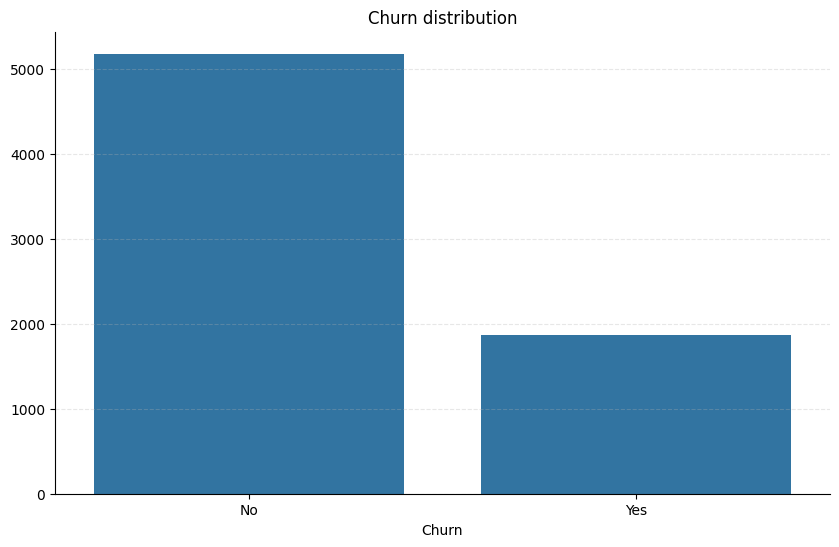

In [135]:
# grafico distribuicao da evasao - churn

# contagem de valores
churn_counts = copia_dn['Churn'].value_counts()

# criacao do grafico barra
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.grid(axis='y', linestyle='--', alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Churn distribution')
plt.show()

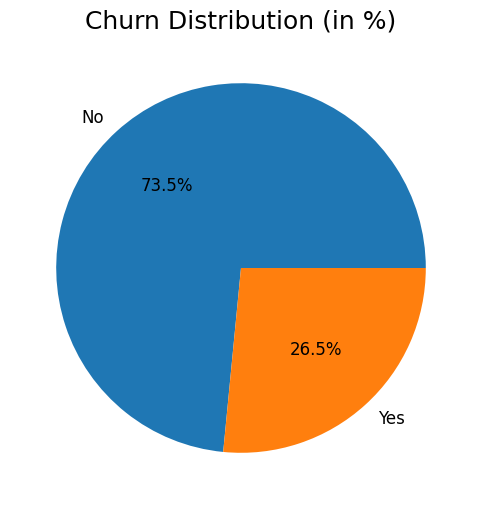

In [164]:
# criacao do grafico pizza - porcentagem churn

plt.figure(figsize=(8, 6))
plt.pie(churn_counts,
        normalize=True,
        labels=churn_counts.index,
        autopct='%1.1f%%',
        textprops={'fontsize':12},
        )
plt.title('Churn Distribution (in %)', fontsize=18)
plt.show()

In [203]:
# lista com todas as variaveis categoricas

col_categoria = list(copia_dn.select_dtypes(include='object').columns[2:])

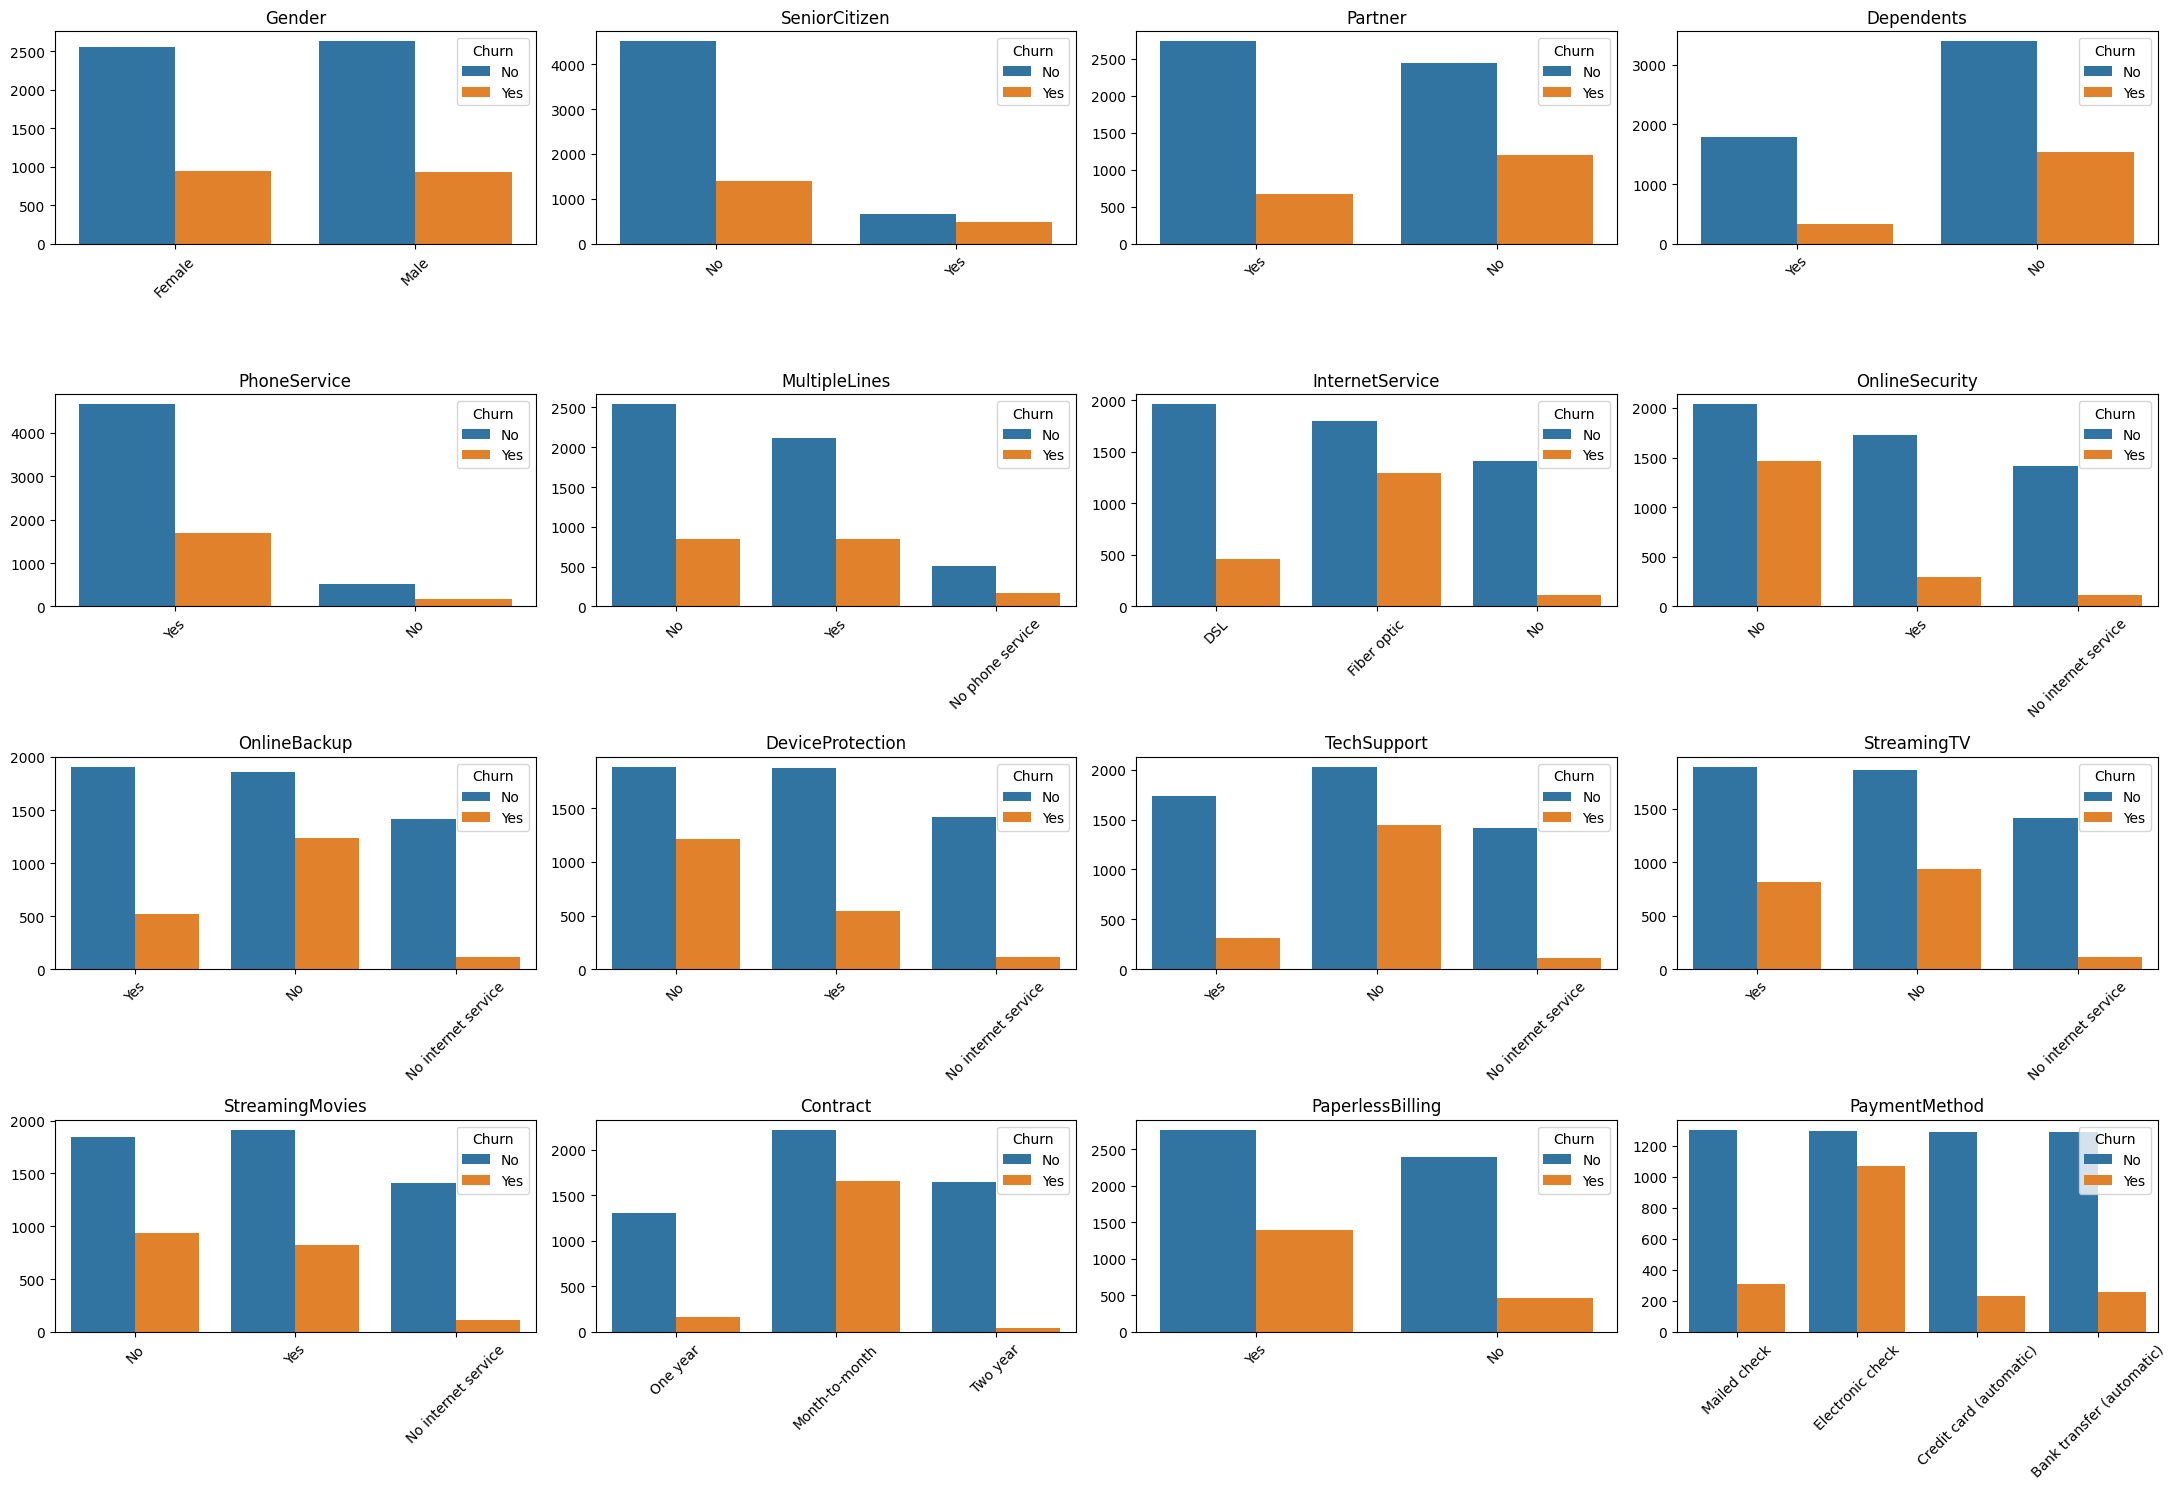

In [206]:
# criacao do grafico barra para as categorias
fig, axs = plt.subplots(4, 4 , figsize=(22,15))

for i, col in enumerate(col_categoria):
    row = i // 4
    ax_col = i % 4
    sns.countplot(x=col, hue='Churn', data=copia_dn, ax=axs[row, ax_col])
    axs[row, ax_col].set_title(col)
    axs[row, ax_col].tick_params(axis='x', rotation=45)
    axs[row, ax_col].set_xlabel('')
    axs[row, ax_col].set_ylabel('')


plt.tight_layout()
plt.show()

In [211]:
# lista com todas as variaveis categoricas numericas

col_numerica = list(copia_dn.select_dtypes(exclude='object').columns)

['Tenure', 'Charges_Monthly', 'Charges_Total', 'Charges_Daily']

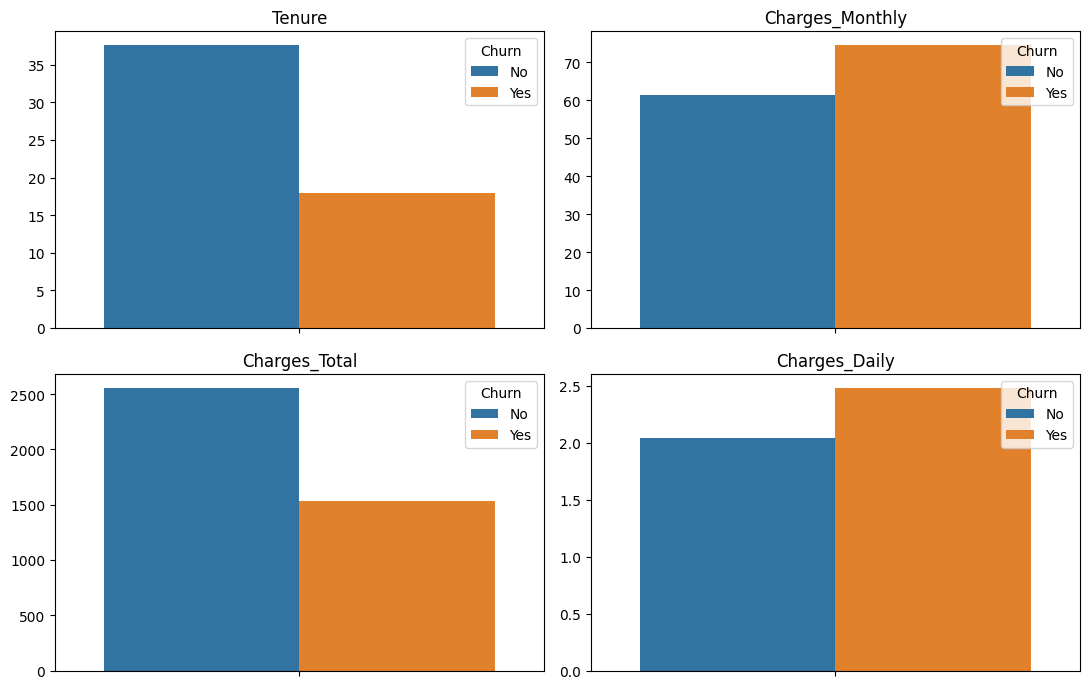

In [221]:
# criacao do grafico barra para as categorias
fig, axs = plt.subplots(2, 2 , figsize=(11,7))

for i, col in enumerate(col_numerica):
    row = i // 2
    ax_col = i % 2
    sns.barplot(y=col, hue='Churn', data=copia_dn, ax=axs[row, ax_col], errorbar=None)
    axs[row, ax_col].set_title(col)
    axs[row, ax_col].tick_params(axis='x', rotation=45)
    axs[row, ax_col].set_xlabel('')
    axs[row, ax_col].set_ylabel('')


plt.tight_layout()
plt.show()

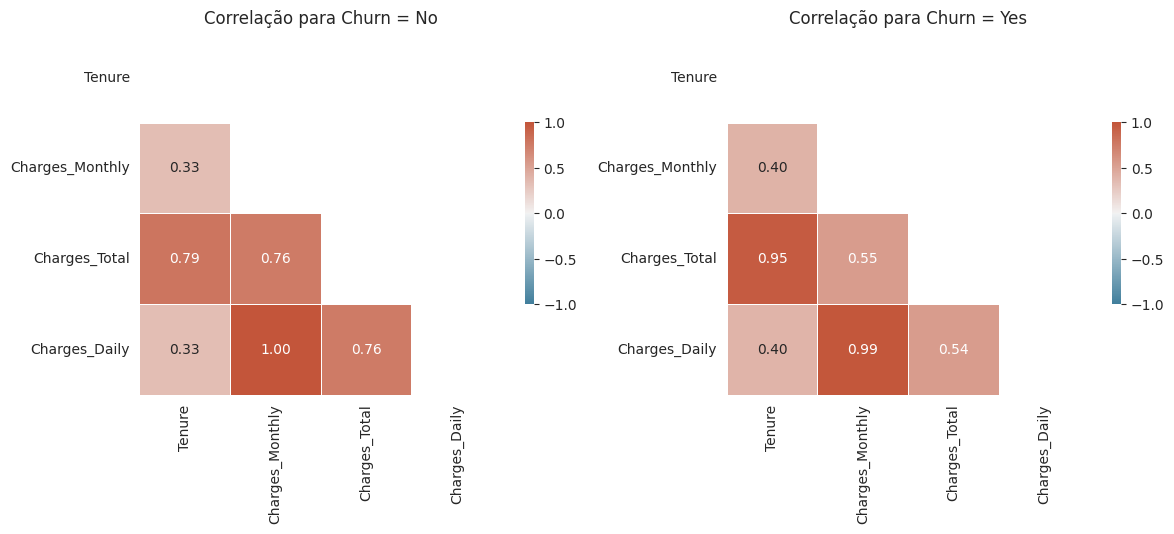

In [237]:
# correlacao entre variaveis

grupos = list(copia_dn.groupby('Churn'))


fig, axes = plt.subplots(1, len(grupos), figsize=(12, 5))
sns.set_style("white")
cmap = sns.diverging_palette(230, 20, as_cmap=True)

for ax, (churn_value, grupo) in zip(axes, grupos):
    corr = grupo.corr(numeric_only=True)
    mask = np.triu(np.ones_like(corr, dtype=bool))

    sns.heatmap(
        corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
        square=True, linewidths=.5, cbar_kws={"shrink": .5},
        annot=True, fmt=".2f", ax=ax
    )
    ax.set_title(f'Correlação para Churn = {churn_value}')

plt.tight_layout()
plt.show()

#📄Relatorio Final